SALARY PREDICTION

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [339]:
data = pd.read_csv("SalaryData.csv")
data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [340]:
data = data.dropna()

In [341]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [342]:
data.shape

(373, 6)

In [343]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [344]:

data.replace({"Education Level": {"Bachelor's": 0, "Master's": 1, "PhD": 2}}, inplace=True)

In [345]:
data.corr()

,Age,Education Level,Years of Experience,Salary
Age,1.000000,0.562693,0.979128,0.922335
Education Level,0.562693,1.000000,0.590863,0.670371
Years of Experience,0.979128,0.590863,1.000000,0.930338
Salary,0.922335,0.670371,0.930338,1.000000


In [346]:
X = data[["Age", "Years of Experience", "Education Level"]]
Y = data["Salary"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [347]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [348]:
regressor.intercept_

-31550.612777683535

In [349]:
regressor.coef_

array([ 2405.07801459,  3604.65250193, 12151.75662816])

In [350]:
y_pred = regressor.predict(X_test)

In [351]:
comparison = pd.DataFrame({"prediction": y_pred,"actual_values": Y_test})
comparison.head(50)

,prediction,actual_values
92,136751.486884,105000.0
36,77859.685246,60000.0
338,152646.120649,150000.0
289,59830.493697,65000.0
95,105503.259814,65000.0
45,43000.876635,40000.0
0,63435.146199,90000.0
93,195781.513157,170000.0
136,159723.130058,140000.0
18,28576.337587,35000.0


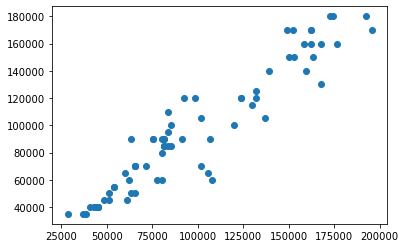

In [352]:
plt.scatter(y_pred, Y_test)

In [353]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)

In [354]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 10695.05
Mean squared error: 222466489.82
Root mean squared error: 14915.31


In [355]:
regressor.score(X_test, Y_test)

0.8876219978393297

In [356]:
regressor.score(X_train, Y_train)

0.8931017400307821